In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pd.options.display.max_columns = None
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
df = pd.read_csv('Datasets\deptos_en_limpieza.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26299 entries, 0 to 26298
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                26299 non-null  int64  
 1   monto             26299 non-null  int64  
 2   ppm2              26294 non-null  float64
 3   superficie_t      26299 non-null  float64
 4   superficie_u      26066 non-null  float64
 5   terraza           16981 non-null  float64
 6   dormitorios       25597 non-null  float64
 7   banos             23986 non-null  float64
 8   estacionamiento   14750 non-null  float64
 9   bodegas           13590 non-null  float64
 10  cantidad_pisos    16239 non-null  float64
 11  piso              16174 non-null  float64
 12  tipo_depto        20883 non-null  object 
 13  antiguedad        20586 non-null  float64
 14  latitud           26299 non-null  float64
 15  longitud          26299 non-null  float64
 16  comuna            26299 non-null  object

In [4]:
df.sample(5)

,id,monto,ppm2,superficie_t,superficie_u,terraza,dormitorios,banos,estacionamiento,bodegas,cantidad_pisos,piso,tipo_depto,antiguedad,latitud,longitud,comuna,calle,orientacion_norm,Or_N,Or_S,Or_E,Or_O
24990,2859568966,11500,92.00,158.00,124.00,34.00,3.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-33.42,-70.55,Las Condes,Mayecura,NaN,0,0,0,0
811,2858243074,47040,137.00,504.00,343.00,85.00,3.00,6.00,4.00,1.00,6.00,1.00,Dúplex,1.00,-33.35,-70.52,Lo Barnechea,Avenida La Dehesa,O,0,0,0,1
5051,2766940950,3200,57.00,56.00,56.00,NaN,2.00,2.00,NaN,NaN,NaN,NaN,NaN,NaN,-33.45,-70.65,Santiago,Lord Cochrane,NaN,0,0,0,0
18991,2859265310,4900,57.00,97.43,84.98,12.45,3.00,2.00,1.00,1.00,13.00,10.00,Departamento,6.00,-33.50,-70.65,San Miguel,Dresden,N,1,0,0,0
6915,2860858924,7500,98.00,82.00,76.00,NaN,3.00,NaN,1.00,1.00,NaN,7.00,Departamento,18.00,-33.42,-70.58,Las Condes,Félix De Amesti,NaN,0,0,0,0


In [5]:
print("estacionamiento\n", df['estacionamiento'].unique())
print("bodegas\n", df['bodegas'].unique())
print("terraza\n", df['terraza'].unique())

estacionamiento
 [ 1.00e+00  2.00e+00  5.00e+00  3.00e+00       nan  4.00e+00  1.00e+01
  1.00e+02  4.00e+01  3.00e+01  6.00e+00  8.00e+00  7.00e+00  3.10e+01
  2.20e+01  2.00e+02  4.80e+01  1.70e+01  5.00e+01  1.20e+02  5.30e+02
  1.20e+01  1.10e+01  9.00e+00  1.30e+01  1.55e+02  1.60e+01  1.50e+01
  2.50e+01  2.60e+01  8.00e+01  2.90e+01  4.50e+01  2.80e+01  2.70e+01
  1.40e+01  5.10e+01  3.90e+01  1.31e+02  1.50e+02  3.27e+02  2.00e+01
  5.60e+01  2.30e+01  0.00e+00  2.10e+01  1.10e+03  4.00e+02  1.10e+02
  6.20e+01  6.60e+01  8.90e+01  1.16e+02  1.03e+02 -1.00e+00]
bodegas
 [ 1.00e+00       nan  2.00e+00  6.00e+00  3.00e+00  5.00e+00  1.00e+01
  4.00e+00  1.42e+02  3.00e+01 -1.00e+00  5.70e+01  1.10e+01  2.34e+02
  1.04e+03  7.50e+01  3.19e+02  3.20e+01  4.90e+01  0.00e+00  1.12e+02
  3.40e+01  7.00e+00  1.50e+01  1.20e+01  5.60e+01  2.30e+01  5.00e+01]
terraza
 [  7.5  158.   330.   ...   7.51 237.98   2.11]


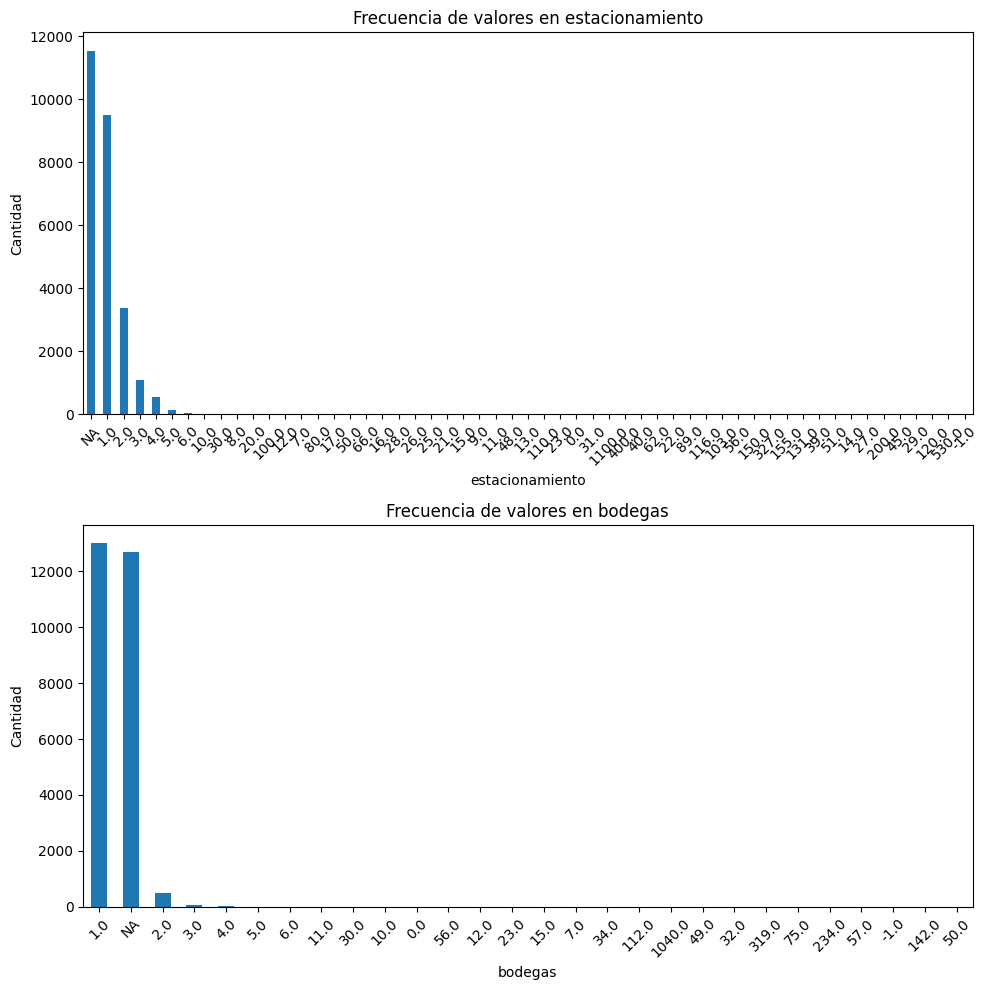

In [7]:
cols = ['estacionamiento', 'bodegas']

plt.figure(figsize=(10,10))

for i, col in enumerate(cols, 1):
    plt.subplot(len(cols), 1, i)
    
    # Convertir todos los valores a string, incluyendo pd.NA correctamente
    series_str = df[col].apply(lambda x: str(x) if pd.notna(x) else 'NA')
    value_counts = series_str.value_counts()
    
    value_counts.plot(kind='bar')
    plt.title(f'Frecuencia de valores en {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [8]:
# Conteo de valores no nulos
print("Frecuencia de los 10 valores más comunes (excluyendo NaNs):")
print(df['terraza'].value_counts().head(10))

print("\nCantidad de valores nulos en 'terraza':")
print(df['terraza'].isnull().sum())

# Contar la cantidad de ceros en la columna 'terraza'
ceros_en_terraza = (df['terraza'] == 0).sum()
print(f"Número de propiedades con terraza de 0 m²: {ceros_en_terraza}")

Frecuencia de los 10 valores más comunes (excluyendo NaNs):
terraza
2.00     2131
3.00     1873
4.00     1172
5.00     1117
10.00     879
6.00      864
20.00     553
1.00      539
8.00      527
7.00      413
Name: count, dtype: int64

Cantidad de valores nulos en 'terraza':
9318
Número de propiedades con terraza de 0 m²: 0


In [9]:
# Conteo de valores no nulos
print("Frecuencia de los 10 valores más comunes (excluyendo NaNs):")
print(df['estacionamiento'].value_counts().head(10))

print("\nCantidad de valores nulos en 'estacionamiento':")
print(df['estacionamiento'].isnull().sum())

# Contar la cantidad de ceros en la columna 'terraza'
ceros_en_estacionamiento = (df['estacionamiento'] == 0).sum()
print(f"Número de propiedades con estacionamiento de 0 m²: {ceros_en_estacionamiento}")

Frecuencia de los 10 valores más comunes (excluyendo NaNs):
estacionamiento
1.00     9497
2.00     3366
3.00     1078
4.00      549
5.00      121
6.00       39
10.00      10
30.00       9
8.00        7
20.00       6
Name: count, dtype: int64

Cantidad de valores nulos en 'estacionamiento':
11549
Número de propiedades con estacionamiento de 0 m²: 1


In [10]:
# Conteo de valores no nulos
print("Frecuencia de los 10 valores más comunes (excluyendo NaNs):")
print(df['bodegas'].value_counts().head(10))

print("\nCantidad de valores nulos en 'bodegas':")
print(df['bodegas'].isnull().sum())

# Contar la cantidad de ceros en la columna 'terraza'
ceros_en_bodegas = (df['bodegas'] == 0).sum()
print(f"Número de propiedades con bodegas de 0 m²: {ceros_en_bodegas}")


Frecuencia de los 10 valores más comunes (excluyendo NaNs):
bodegas
1.00     13014
2.00       483
3.00        48
4.00        12
5.00         6
6.00         3
11.00        2
30.00        2
10.00        2
0.00         1
Name: count, dtype: int64

Cantidad de valores nulos en 'bodegas':
12709
Número de propiedades con bodegas de 0 m²: 1


#### Justificación Unificada para la Imputación de 'Terraza', 'Estacionamiento' y 'Bodegas' con 0
Dada la naturaleza del dataset, obtenido mediante web scraping con ingreso manual de información por parte de usuarios, se observa un patrón consistente en las columnas terraza, estacionamiento y bodegas. Para terraza, existe un alto volumen de valores nulos (NaN) y ningún valor explícito de 0. Para estacionamiento y bodegas, también hay un número significativo de NaNs, y la única instancia de un valor 0 explícito para ambas columnas corresponde a la misma propiedad, lo que sugiere un comportamiento de ingreso de datos anómalo o específico de un usuario. Estadísticamente, es altamente improbable que ninguna de las 26,000 propiedades carezca de terraza, estacionamiento o bodega. Por ello, la evidencia contextual y el conocimiento del dominio inmobiliario chileno (donde muchas propiedades, especialmente de ciertas tipologías o ubicaciones, carecen naturalmente de estas características) nos permiten concluir que la ausencia de un valor en estas columnas (NaN) representa la ausencia de la característica, es decir, un valor de 0 m² o 0 unidades. Imputar los valores nulos con 0 para estas tres columnas es la estrategia más lógica y estadísticamente válida, ya que traduce la ausencia implícita a un valor numérico explícito, permitiendo que tu modelo predictivo capture de manera precisa el impacto de la no existencia de estas características en el valor de la propiedad.

In [11]:
df_limpio = df.copy()
columnas_a_imputar = ['terraza', 'estacionamiento', 'bodegas']

# 3. Reemplazar los valores faltantes (NaN) por 0 en las columnas especificadas
for col in columnas_a_imputar:
    df_limpio[col] = df_limpio[col].fillna(0)

print("Cantidad de NaNs después de la imputación:")
print(df_limpio[columnas_a_imputar].isnull().sum())

Cantidad de NaNs después de la imputación:
terraza            0
estacionamiento    0
bodegas            0
dtype: int64


In [13]:
df_limpio['estacionamiento'] = pd.to_numeric(df_limpio['estacionamiento'], errors='coerce')
df_limpio['estacionamiento'] = df_limpio['estacionamiento'].astype('Int64')

df_limpio['bodegas'] = pd.to_numeric(df_limpio['bodegas'], errors='coerce')
df_limpio['bodegas'] = df_limpio['bodegas'].astype('Int64')

In [14]:
print("estacionamiento\n", df_limpio['estacionamiento'].unique())
print("bodegas\n", df_limpio['bodegas'].unique())
print("terraza\n", df_limpio['terraza'].unique())

estacionamiento
 <IntegerArray>
[   1,    2,    5,    3,    0,    4,   10,  100,   40,   30,    6,    8,    7,
   31,   22,  200,   48,   17,   50,  120,  530,   12,   11,    9,   13,  155,
   16,   15,   25,   26,   80,   29,   45,   28,   27,   14,   51,   39,  131,
  150,  327,   20,   56,   23,   21, 1100,  400,  110,   62,   66,   89,  116,
  103,   -1]
Length: 54, dtype: Int64
bodegas
 <IntegerArray>
[   1,    0,    2,    6,    3,    5,   10,    4,  142,   30,   -1,   57,   11,
  234, 1040,   75,  319,   32,   49,  112,   34,    7,   15,   12,   56,   23,
   50]
Length: 27, dtype: Int64
terraza
 [  7.5  158.   330.   ...   7.51 237.98   2.11]


##### Valores incoherentes
Notamos valores  que no tienen sentido respecto a la variable, como tener numero negativo de estacionamientos o bodegas, o 1100 estacionamientos o 1040 bodegas.
Son pocas filas, de modo que se dropearán.

In [15]:
umbral_estacionamiento = 10
conteo_estacionamiento_atipico = df_limpio[df_limpio['estacionamiento'] > umbral_estacionamiento].shape[0]

print(f"Número de propiedades con más de {umbral_estacionamiento} estacionamientos: {conteo_estacionamiento_atipico}")

# Contar valores atípicos en 'bodegas'
umbral_bodegas = 5
conteo_bodegas_atipico = df_limpio[df_limpio['bodegas'] > umbral_bodegas].shape[0]

print(f"Número de propiedades con más de {umbral_bodegas} bodegas: {conteo_bodegas_atipico}")

# Opcional: Ver algunos de los valores atípicos para confirmar
print("\nValores de 'estacionamiento' superiores a 10 (primeros 20):")
print(df_limpio[df_limpio['estacionamiento'] > umbral_estacionamiento]['estacionamiento'].value_counts().head(20))

print("\nValores de 'bodegas' superiores a 5 (primeros 20):")
print(df_limpio[df_limpio['bodegas'] > umbral_bodegas]['bodegas'].value_counts().head(20))

Número de propiedades con más de 10 estacionamientos: 76
Número de propiedades con más de 5 bodegas: 25

Valores de 'estacionamiento' superiores a 10 (primeros 20):
estacionamiento
30     9
20     6
100    4
12     4
17     3
50     3
80     3
11     2
25     2
15     2
16     2
21     2
26     2
28     2
48     2
66     2
23     1
327    1
56     1
400    1
Name: count, dtype: Int64

Valores de 'bodegas' superiores a 5 (primeros 20):
bodegas
6       3
30      2
11      2
10      2
112     1
23      1
56      1
12      1
15      1
7       1
34      1
32      1
49      1
319     1
75      1
1040    1
234     1
57      1
142     1
50      1
Name: count, dtype: Int64


In [16]:
# Definir los umbrales
umbral_estacionamiento_max = 10
umbral_bodegas_max = 5


# Identificar las filas a eliminar: aquellas donde 'estacionamiento' > 10 O 'bodegas' > 5
# Usamos el operador lógico OR (|) para eliminar si se cumple CUALQUIERA de las dos condiciones
filas_a_eliminar_atipicos = df_limpio[
    (df_limpio['estacionamiento'] > umbral_estacionamiento_max) |
    (df_limpio['bodegas'] > umbral_bodegas_max)
].index

# Eliminar las filas identificadas
df_limpio = df_limpio.drop(filas_a_eliminar_atipicos)

# Opcional: Confirmar que ya no hay valores por encima de los umbrales
print("\nValores de 'estacionamiento' > 10 después de eliminar:",
      df_limpio[df_limpio['estacionamiento'] > umbral_estacionamiento_max].shape[0])
print("Valores de 'bodegas' > 5 después de eliminar:",
      df_limpio[df_limpio['bodegas'] > umbral_bodegas_max].shape[0])


Valores de 'estacionamiento' > 10 después de eliminar: 0
Valores de 'bodegas' > 5 después de eliminar: 0


In [17]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26205 entries, 0 to 26298
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                26205 non-null  int64  
 1   monto             26205 non-null  int64  
 2   ppm2              26200 non-null  float64
 3   superficie_t      26205 non-null  float64
 4   superficie_u      25974 non-null  float64
 5   terraza           26205 non-null  float64
 6   dormitorios       25504 non-null  float64
 7   banos             23893 non-null  float64
 8   estacionamiento   26205 non-null  Int64  
 9   bodegas           26205 non-null  Int64  
 10  cantidad_pisos    16156 non-null  float64
 11  piso              16110 non-null  float64
 12  tipo_depto        20792 non-null  object 
 13  antiguedad        20495 non-null  float64
 14  latitud           26205 non-null  float64
 15  longitud          26205 non-null  float64
 16  comuna            26205 non-null  object 
 17

In [19]:
df_limpio.to_csv('Datasets\deptos_en_limpieza.csv', index=False)